# Tutorial: how to plot SAT-EX data on a world map

The [matplotlib basemap toolkit](http://matplotlib.org/basemap/users/mapsetup.html) is a library for plotting 2D data on maps in Python. To make things easier, we provide a module with some custom functions that makes
use of basemap to make plots with SAT-EX data. 

**In order to use these functions, your data should be in the following format: a latitude column, a longitude column, and one or more columns with the values you want to put on the map:**

| lat | lon | Value |
|----------|-----------|-------|
| ... | ... | ... |
| ... | ... | ... |
| ... | ... | ... |
| ... | ... | ... |
| ... | ... | ... |
| ... | ... | ... |
| ... | ... | ... |

Below, the use of this custom module is illustrated with some example data.

### Example: visualizing temperature

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Let's import the custom module: 

In [2]:
import lib_plot as lp

The module contains two main functions: 
- convert_data() to convert a pandas dataframe to a numpy array suitable for plotting with basemap
- basemap_plot() to make the actual plot

(Use shift+tab to get more information about the arguments for these functions).

An example dataframe is provided in this repository. Let's read it in and inspect it:

In [3]:
DF = pd.read_csv("exampleDF.csv")
DF.head()

,lat,lon,T_CRU_20100131
0,-14.5,127.5,29.4002
1,53.5,63.5,-13.7500
2,76.5,-49.5,-27.1746
3,-32.5,121.5,23.2250
4,55.5,111.5,-31.1497


The dataframe contains three columns: latitude, longitude and the CRU temperature record from January 2010. We want to plot the temperature on the world map. In order to get an idea of its distribution, let's first have a look at a histogram:

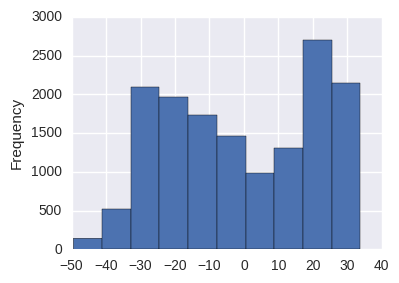

In [4]:
fig, ax1 = plt.subplots(figsize=(4,3))
DF['T_CRU_20100131'].plot(kind='hist', ax=ax1)
plt.show()

The values in this dataset take on values between -50 and 40 degrees. We can plot these values on the world map as follows:

First, we want to convert the dataframe to a plottable array using convert_data()

In [5]:
globalmaparray = lp.convert_data(DF, key='T_CRU_20100131')

We can use this array to make a plot. The `colscheme` argument allows to specify a colorbrewer color scheme. Because the temperature can be both positive or negative, a diverging color scheme seems appropriate here. For more color schemes, check http://seaborn.pydata.org/tutorial/color_palettes.html and http://colorbrewer2.org/. The `boundaries` argument allows to specify the boundaries of the colorbar.

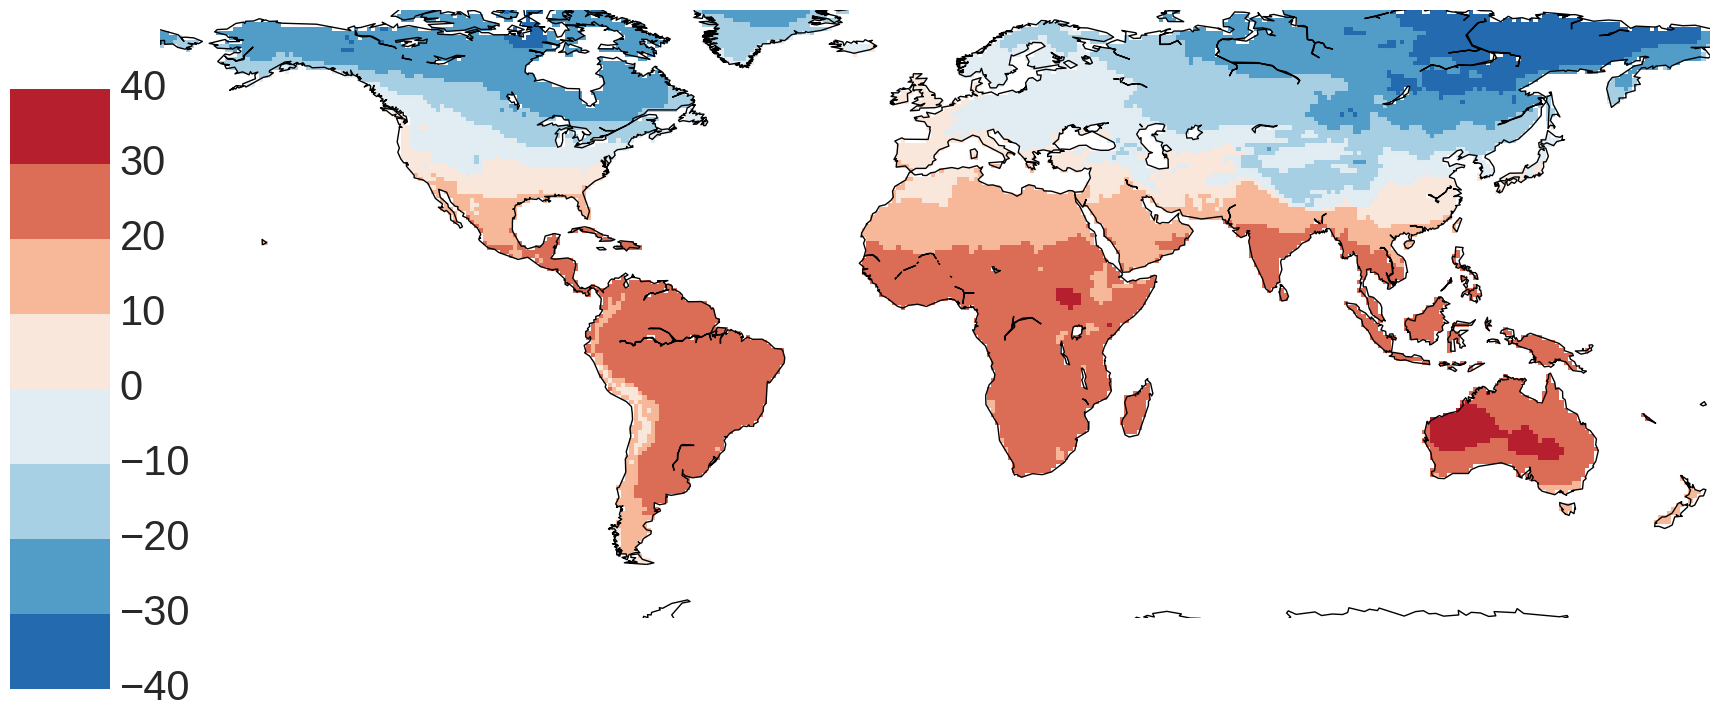

In [6]:
fig, ax = plt.subplots(figsize=(20,12))
lp.basemap_plot(fig, ax, globalmaparray, colscheme='RdBu_r', boundaries=[-40,-30,-20,-10,0,10,20,30,40], colorbar=True)
plt.show()

You can also pass a custom colormap to the `customcol` argument. Make sure it has the correct lenght (len(boundaries -1).

In [7]:
from matplotlib import colors as colors
cmap = colors.ListedColormap([ 'black','#edf8e9','red','#74c476','#31a354','yellow', 'purple', '1'])

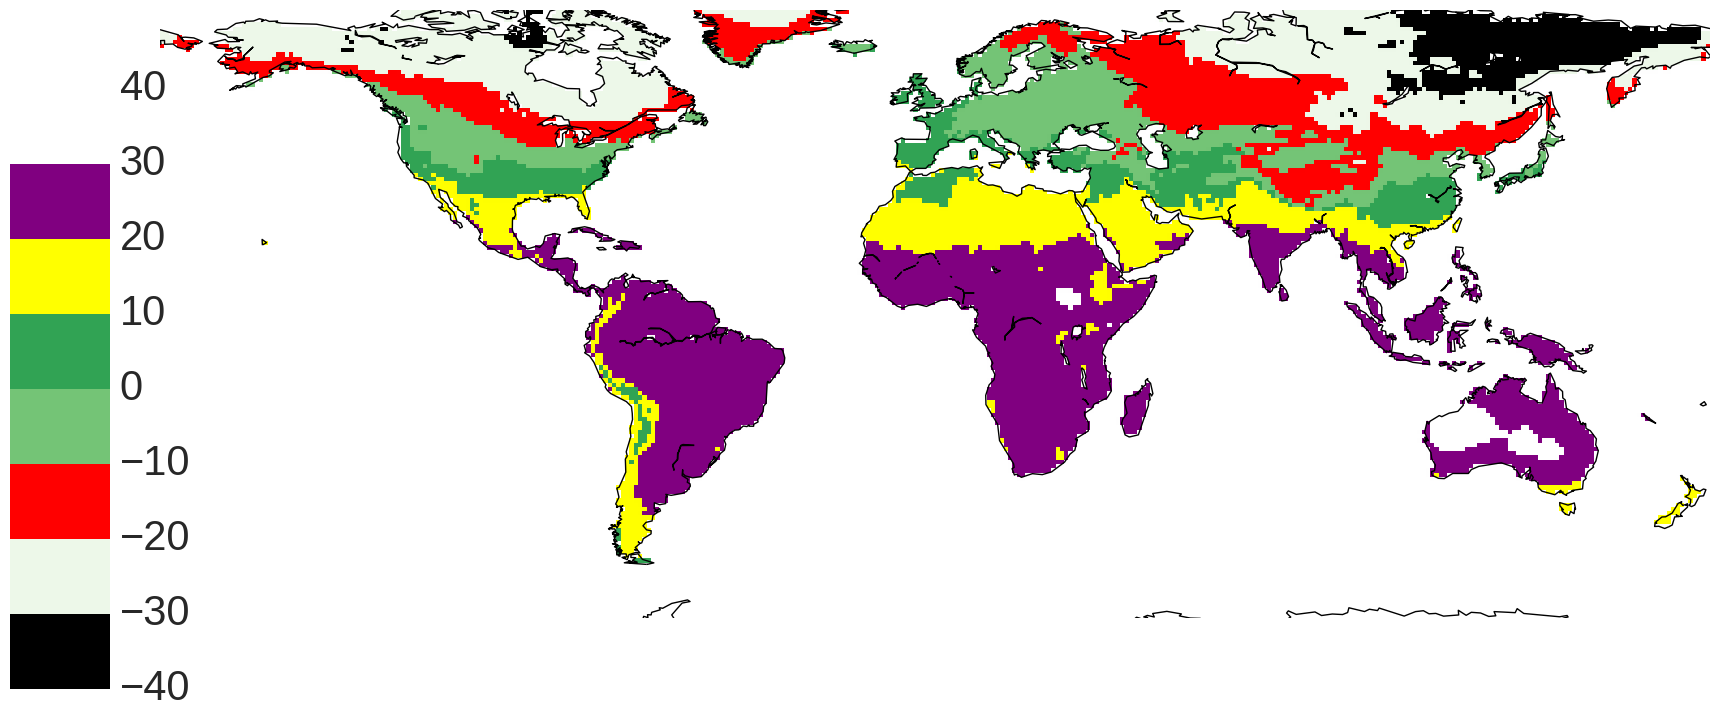

In [8]:
fig, ax = plt.subplots(figsize=(20,12))
lp.basemap_plot(fig, ax, globalmaparray, customcol=cmap, boundaries=[-40,-30,-20,-10,0,10,20,30,40])
plt.show()

Finally, let's save the figure:

In [9]:
fig.savefig('/home/stijndc/Desktop/uglymap.png')